# Data visualization
TD relax pour vous montrer comment faire de la dataviz.
Je vous laisse executer le code pour chacun de cest exemples, et poser vos questions.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
import seaborn as sns


## Clustering

In [2]:
n_samples = 1500
random_state = 8
dataset = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.5, 2.5, 1.5], random_state=random_state)[0]

In [3]:
dataset

array([[ 5.06695307,  7.58032119],
       [ 4.68625569, 10.21402627],
       [ 7.10333239, 10.98788628],
       ...,
       [ 7.87081742, 11.55742418],
       [-4.25279969, -9.58682779],
       [-2.5568859 , -9.00049187]])

Simple scatter plot en 2D:

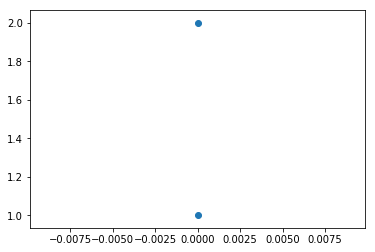

In [5]:
plt.scatter([0, 0], [1, 2])

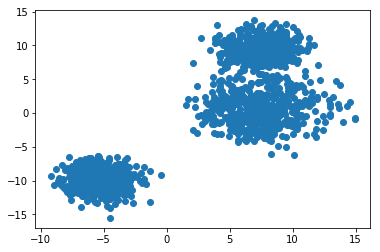

In [14]:
plt.scatter(dataset[:,0],dataset[:,1])

Densité des données sur un axe:

/Users/theophilepace/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


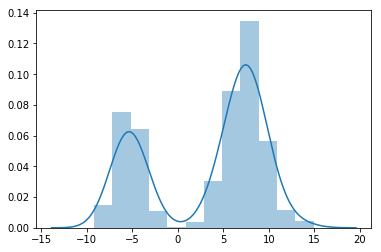

In [15]:
sns.distplot(dataset[:,0])

### K-means

In [18]:
# simple K-means:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
pred = kmeans.fit_predict(dataset)

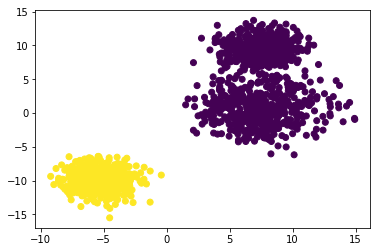

In [20]:
def plot_clustering(X,y:np.array=None):
    if y is None:
        plt.scatter(X[:,0],X[:,1])
    else:
        # comprehension_list_colors = [color_map[y_clust] for y_clust in y]
        plt.scatter(X[:,0],X[:,1],c=y)
    plt.show()
plot_clustering(dataset,pred)

Dessiner l'évolution d'un hyper parametre

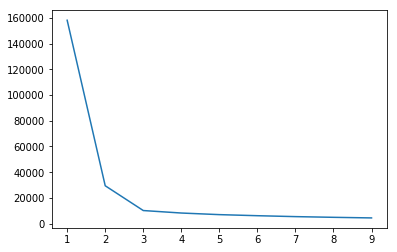

In [23]:
def search_hyperparamter(dataset, max_hyperparameter):
    inertias = []
    for k in range(1,max_hyperparameter):
        kmeans = KMeans(n_clusters=k)
        pred = kmeans.fit_predict(dataset)
        inertias.append(kmeans.inertia_)
    return inertias
result_search = search_hyperparamter(dataset,10)
plt.plot(range(1,len(result_search)+1),result_search)

## PCA
On réalise une PCA, et on trace les données sur quelques axes:

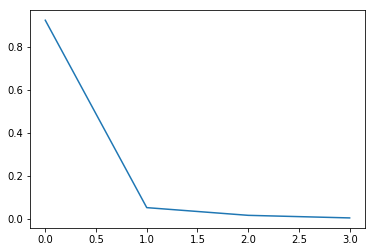

In [6]:
from sklearn.decomposition import PCA
iris = datasets.load_iris()
iris_data = iris['data']
pca = PCA(n_components=4)
val = pca.fit(iris_data)
# plot dee la variance expliquée
plt.plot(pca.explained_variance_ratio_)

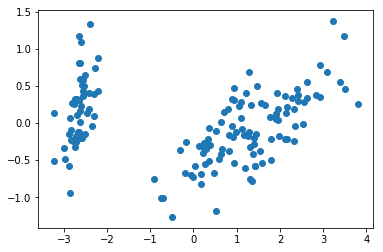

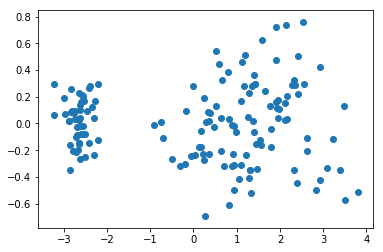

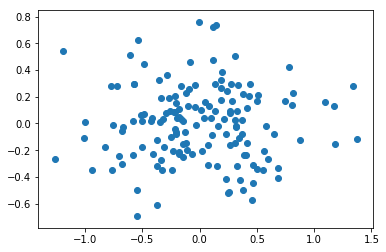

In [27]:
iris_pca = val.fit_transform(iris_data)
plt.scatter(iris_pca[:,0], iris_pca[:,1])
plt.show()
plt.scatter(iris_pca[:,0], iris_pca[:,2])
plt.show()
plt.scatter(iris_pca[:,1], iris_pca[:,2])
plt.show()

Cependant, c'est moche car c'est graphe ne sont pas alignés, ça fait désordre. Quand on veut plot plusieur graphs, on utilise subplot. En gros, ça fait un tableau de graphes. Exemple:

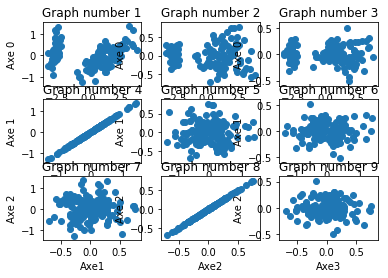

In [34]:
iris_pca = val.fit_transform(iris_data)
nrows=3 
ncols=3
# Regardez la doc string de plt.subplot ! 

# les index se calculent comme ça 
# 1 2 3
# 4 5 6
# 7 8 9
for i in range(nrows):
    for j in range(1,ncols+1):
        index = i*3+j
        plt.subplot(nrows, ncols,index)
        plt.scatter(iris_pca[:,i], iris_pca[:,j])
        plt.title(f"Graph number {index}")
        plt.xlabel(f"Axe{j}")
        plt.ylabel(f"Axe {i}")


On pourrait ajouter les couleurs des classes ? Cela permet de visualiser la faciliter d'un dataset. Le graphe suivant est __Très important__ car il vous permet de savoir si vos classes seront facilement séparables:

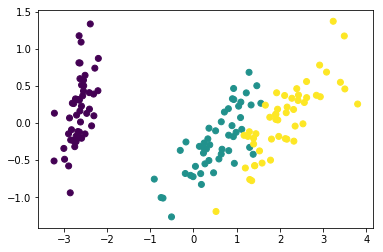

In [36]:
plt.scatter(iris_pca[:,0], iris_pca[:,1],c=iris.target)

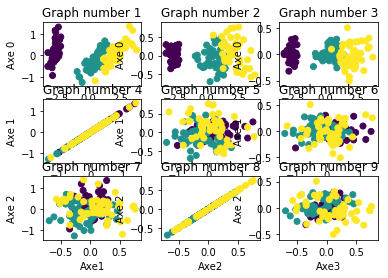

In [37]:
iris_pca = val.fit_transform(iris_data)
nrows=3 
ncols=3
# Regardez la doc string de plt.subplot ! 

# les index se calculent comme ça 
# 1 2 3
# 4 5 6
# 7 8 9
for i in range(nrows):
    for j in range(1,ncols+1):
        index = i*3+j
        plt.subplot(nrows, ncols,index)
        plt.scatter(iris_pca[:,i], iris_pca[:,j],c=iris.target)
        plt.title(f"Graph number {index}")
        plt.xlabel(f"Axe{j}")
        plt.ylabel(f"Axe {i}")


## Classification

In [39]:
# hyperparamter
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names

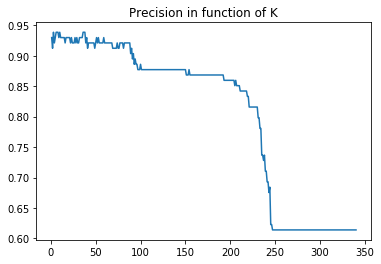

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_tv,X_test, y_tv,y_test = train_test_split(X,y,test_size=.2, random_state=42)
X_train,X_validation,y_train,y_validation = train_test_split(X_tv,y_tv,test_size=.25,random_state=42)
from sklearn.neighbors import KNeighborsClassifier
K_max = len(X_train)
accuracies = []
for K in range(1,K_max,1):
    # declare classifier with hyperparameters
    knn = KNeighborsClassifier(n_neighbors=K)
    # train (aka fit) the classifier on the train dataset
    knn.fit(X_train,y_train)
    # predict the validation dataset
    y_validation_hat = knn.predict(X_validation)
    # check the result
    accuracies.append(accuracy_score(y_pred=y_validation_hat,y_true=y_validation))
# si on trace juste le tableau, on sera décalé de 1
plt.plot(range(1,K_max),accuracies)
plt.title("Precision in function of K")
plt.show()

### SVM

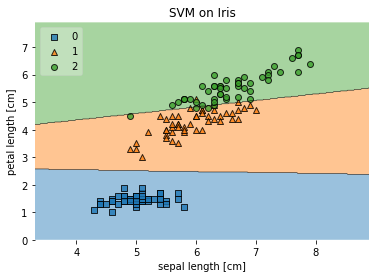

In [47]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

On entraine quelques classifeur de hier. Pas de panique, ça fait beaucoup de code mais vous avez tout vu hier / ce matin:

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np

# Initializing Classifiers
clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='multinomial')
clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto')

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0,2]]
y = iris.target

# une liste avec nos classifier, et on les entraine chacun:
for clf in [clf1, clf2, clf3, clf4]:
    clf.fit(X, y)


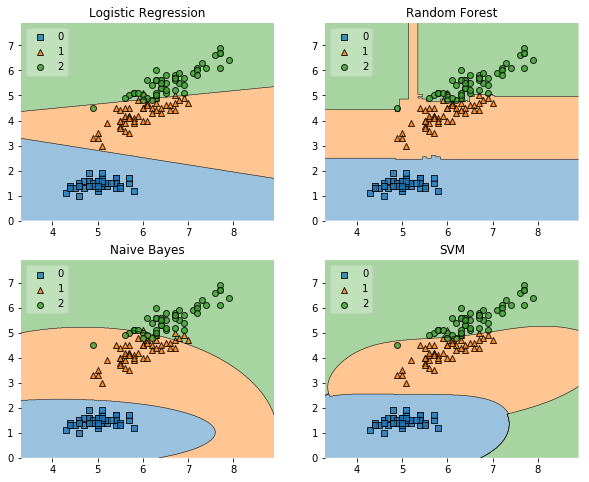

In [50]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

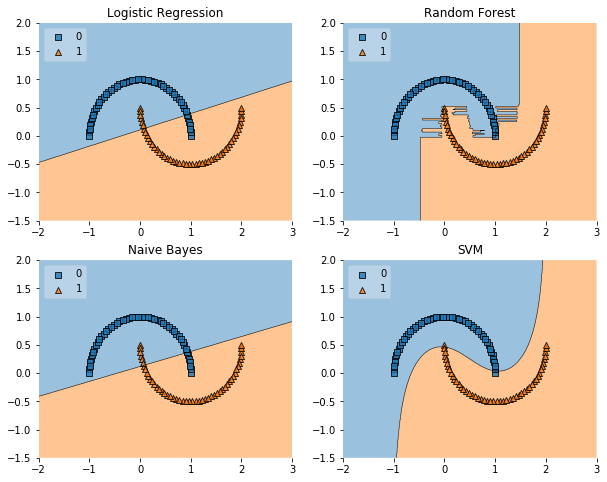

In [52]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

## Pour continuer

Vous trouverez de nombreux autres exemples à http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/ 